In [1]:
import matplotlib.pyplot as plt
import parse_access_om2_results as par
import plot_access_om2_scaling as pas
import plot_pandas_data as ppd
import plot_right_axis_years_days as yd

In [2]:
df = par.parse_om2_dataframe("../archive")

In [3]:
ocean_cice_ratio_middle = 7

In [4]:
const_ice_nbr_blocks = 5767

In [5]:
high_ice_ncpus=df[df["ocean_ncpus"] / df["ice_ncpus"] <= ocean_cice_ratio_middle]
low_ice_ncpus=df[df["ocean_ncpus"] / df["ice_ncpus"] > ocean_cice_ratio_middle]
low_ncpus_const_blocks=low_ice_ncpus[low_ice_ncpus["ice_nbr_blocks"] == const_ice_nbr_blocks]
low_ncpus_var_blocks=low_ice_ncpus[low_ice_ncpus["ice_nbr_blocks"] != const_ice_nbr_blocks]

In [6]:
def plot_ice_block_comparison(plot_fn, x, data,
        xticks=[], 
        yticks=[],
        right_axis_fn=yd.no_right_axis,
        right_yticks=[],
        format_str="{:g}"):
    if xticks == []:
        xticks = data[x].sort_values().unique()
    xtick_labels = [str(int(val)) for val in xticks]
    fig, ax = plt.subplots()
    plots = []
    plots.append(plot_fn(high_ice_ncpus))
    plots.append(plot_fn(low_ncpus_const_blocks))
    plots.append(plot_fn(low_ncpus_var_blocks))
    plt.xticks(xticks, xtick_labels, rotation=45)
    ax.set_xticks([], minor=True)
    if yticks != []:
        ytick_labels = [str(val) for val in yticks]
        plt.yticks(yticks, ytick_labels)
        ax.set_yticks([], minor=True)
    right_axis = right_axis_fn(
        ax, 
        right_yticks=right_yticks,
        format_str=format_str)
    legend = (
            "High CICE ncpus",
            "Low CICE ncpus, const #blocks",
            "Low CICE ncpus, var #blocks")
    plt.legend((plot[0] for plot in plots), legend)

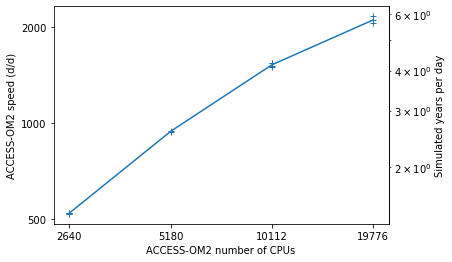

In [7]:
pas.plot_by_xy_labels_fn(
    pas.loglog_om2_speed_by_ncpus,
    "om2_ncpus",
    data=high_ice_ncpus,
    yticks=[500,1000,2000])

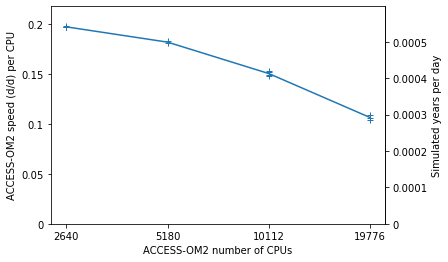

In [8]:
pas.plot_by_xy_labels_fn(
    pas.semilogx_om2_speed_per_cpu_by_ncpus,
    "om2_ncpus", 
    data=high_ice_ncpus,
    yticks=[0,0.05,0.1,0.15,0.2],
    right_yticks=[n/10000.0 for n in range(6)])

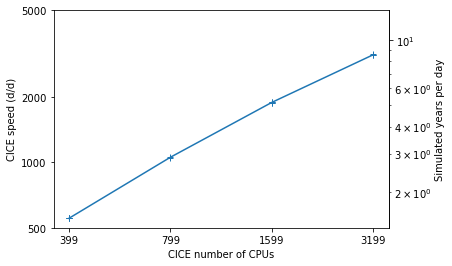

In [9]:
pas.plot_by_xy_labels_fn(
    pas.loglog_ice_speed_by_ncpus, 
    "ice_ncpus", 
    data=high_ice_ncpus,
    yticks=[500,1000,2000,5000],
    right_yticks=[1,2,5,10,20])

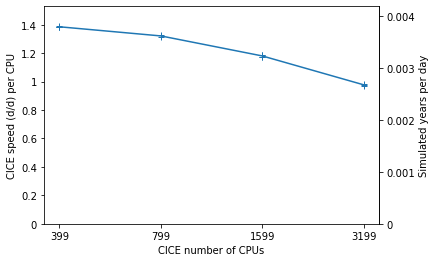

In [10]:
pas.plot_by_xy_labels_fn(
    pas.semilogx_ice_speed_per_cpu_by_ncpus,
    "ice_ncpus",
    data=high_ice_ncpus,
    yticks=[n/5.0 for n in range(8)],
    right_yticks=[n/1000.0 for n in range(8)])

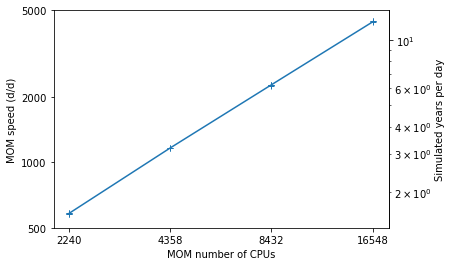

In [11]:
pas.plot_by_xy_labels_fn(
    pas.loglog_ocean_speed_by_ncpus,
    "ocean_ncpus", 
    data=high_ice_ncpus,
    yticks=[500,1000,2000,5000],
    right_yticks=[1,2,5,10])

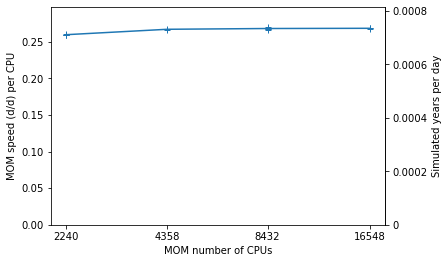

In [12]:
pas.plot_by_xy_labels_fn(
    pas.semilogx_ocean_speed_per_cpu_by_ncpus,    
    "ocean_ncpus",
    data=high_ice_ncpus,
    right_axis_fn=yd.plot_right_axis_yd,
    right_yticks=[n/5000.0 for n in range(10)])

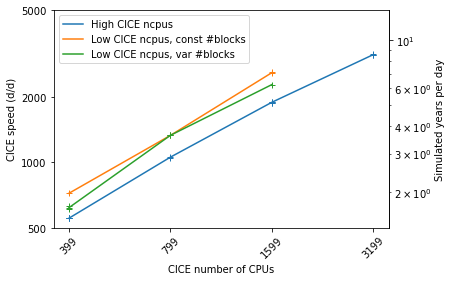

In [13]:
plot_ice_block_comparison(
    pas.loglog_ice_speed_by_ncpus,
    "ice_ncpus", 
    df,
    yticks=[500,1000,2000,5000],
    right_axis_fn=yd.plot_right_axis_yd,
    right_yticks=[1,2,5,10])

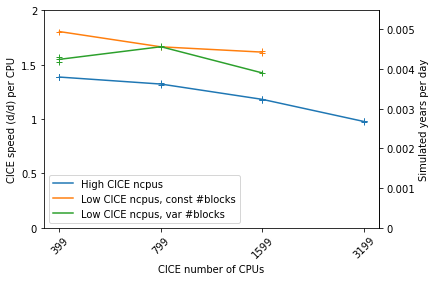

In [14]:
plot_ice_block_comparison(
    pas.semilogx_ice_speed_per_cpu_by_ncpus,
    "ice_ncpus", 
    df,
    yticks=[0,0.5,1,1.5,2],
    right_yticks=[n/1000.0 for n in range(6)],
    right_axis_fn=yd.plot_right_axis_yd)

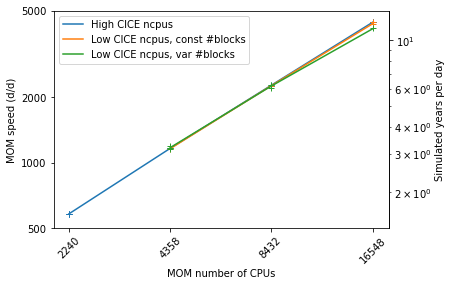

In [15]:
plot_ice_block_comparison(
    pas.loglog_ocean_speed_by_ncpus,
    "ocean_ncpus",
    df,
    yticks=[500,1000,2000,5000],
    right_yticks=[1,2,5,10],
    right_axis_fn=yd.plot_right_axis_yd)

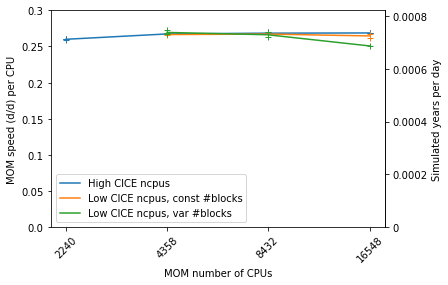

In [16]:
plot_ice_block_comparison(
    pas.semilogx_ocean_speed_per_cpu_by_ncpus,
    "ocean_ncpus",
    df,
    yticks=[n/20.0 for n in range(7)],
    right_yticks=[n/5000.0 for n in range(5)],
    right_axis_fn=yd.plot_right_axis_yd)

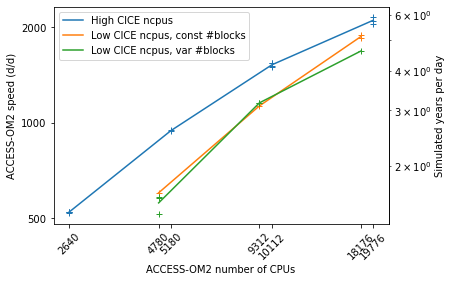

In [17]:
plot_ice_block_comparison(
    pas.loglog_om2_speed_by_ncpus,
    "om2_ncpus",
    df,
    yticks=[500,1000,2000],
    right_yticks=[1, 2, 5],
    right_axis_fn=yd.plot_right_axis_yd)

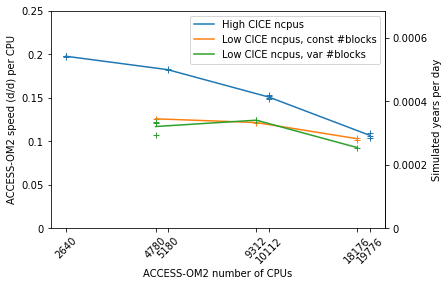

In [18]:
plot_ice_block_comparison(
    pas.semilogx_om2_speed_per_cpu_by_ncpus,
    "om2_ncpus",
    df,
    yticks=[0,0.05,0.1,0.15,0.2,0.25],
    right_yticks=[n/5000.0 for n in range(4)],
    right_axis_fn=yd.plot_right_axis_yd)

In [19]:
def get_mean(df, x, y):
    mean_y_by_x=dict()
    group_ncpus=df.groupby(x)
    for name, group in group_ncpus:
        means = group.groupby(x)[y].mean()
        mean_y_by_x[name] = round(means[name], 2)
    return mean_y_by_x

In [20]:
print("High")
print(get_mean(high_ice_ncpus,"om2_ncpus","OM2 speed per cpu"))
print("Const")
print(get_mean(low_ncpus_const_blocks,"om2_ncpus","OM2 speed per cpu"))
print("Var")
print(get_mean(low_ncpus_var_blocks,"om2_ncpus","OM2 speed per cpu"))

High
{2640: 0.2, 5180: 0.18, 10112: 0.15, 19776: 0.11}
Const
{4780: 0.13, 9312: 0.12, 18176: 0.1}
Var
{4780: 0.12, 9312: 0.12, 18176: 0.09}


In [21]:
print("High")
print(get_mean(high_ice_ncpus,"ocean_ncpus","Ocean speed per cpu"))
print("Const")
print(get_mean(low_ncpus_const_blocks,"ocean_ncpus","Ocean speed per cpu"))
print("Var")
print(get_mean(low_ncpus_var_blocks,"ocean_ncpus","Ocean speed per cpu"))

High
{2240: 0.26, 4358: 0.27, 8432: 0.27, 16548: 0.27}
Const
{4358: 0.27, 8432: 0.27, 16548: 0.26}
Var
{4358: 0.27, 8432: 0.27, 16548: 0.25}


In [22]:
print("High")
print(get_mean(high_ice_ncpus,"ice_ncpus","Ice speed per cpu"))
print("Const")
print(get_mean(low_ncpus_const_blocks,"ice_ncpus","Ice speed per cpu"))
print("Var")
print(get_mean(low_ncpus_var_blocks,"ice_ncpus","Ice speed per cpu"))

High
{399: 1.39, 799: 1.32, 1599: 1.18, 3199: 0.98}
Const
{399: 1.8, 799: 1.66, 1599: 1.61}
Var
{399: 1.55, 799: 1.66, 1599: 1.42}


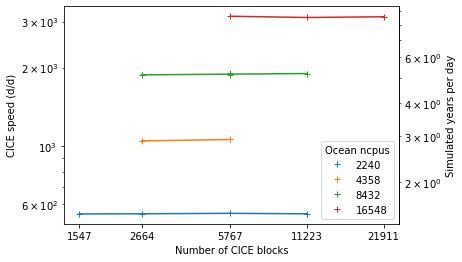

In [23]:
pas.loglog_ice_speed_by_ocean_ncpus_nbr_blocks(high_ice_ncpus)

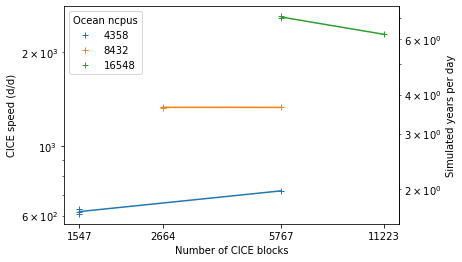

In [24]:
pas.loglog_ice_speed_by_ocean_ncpus_nbr_blocks(low_ice_ncpus)

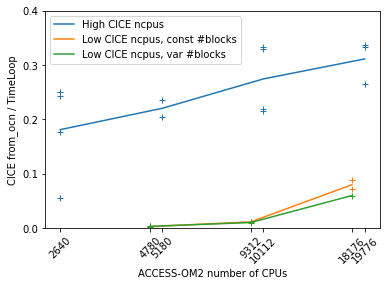

In [25]:
yticks=[n/10.0 for n in range(5)]
plot_ice_block_comparison(
    pas.semilogx_relative_ice_from_ocn_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=yticks)

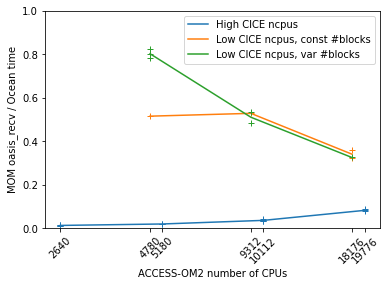

In [26]:
plot_ice_block_comparison(
    pas.semilogx_relative_ocean_oasis_recv_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=[n/5.0 for n in range(6)])

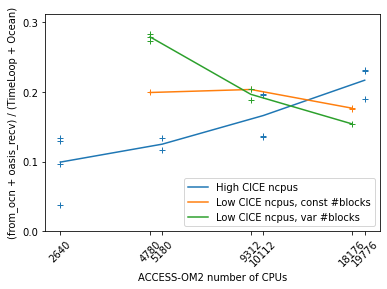

In [27]:
plot_ice_block_comparison(
    pas.semilogx_relative_wait_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=[n/10.0 for n in range(4)])

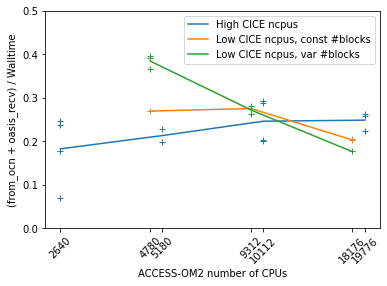

In [28]:
plot_ice_block_comparison(
    pas.semilogx_walltime_wait_by_om2_ncpus,
    "om2_ncpus",
    df,
    yticks=[n/10.0 for n in range(6)])